#1. Import libraries dan data

In [1]:
#data manipulation and visualisation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#import interactive library
from ipywidgets import interact

#balancing the target variable
from imblearn.over_sampling import RandomOverSampler

#variable scaling libraries
from sklearn.preprocessing import StandardScaler

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#feature selection libraries
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#import hyperparameter tuning library
from sklearn.model_selection import GridSearchCV

#other libraries
import math
from collections import Counter

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AlifnurFathurrahmanPrasodjo/dataFolder/main/dataMining/waterQuality1.csv')

#2. Exploratory Data Analysis

Kami melakukan Analisis Data Eksplorasi untuk:
1. Memahami variabel kumpulan data
1. Bersihkan kumpulan data
1. Plot variabel kumpulan data
1. Menganalisis hubungan antar variabel

**2.1, 2.2 Memahami variabel kumpulan data dan membersihkannya**

In [ ]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
data.shape

(7999, 21)

In [ ]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
#tipe data dari semua atribut yang ada dalam kumpulan data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

**Address Data yang Hilang**

In [3]:
#membuang nilai yang hilang
data['ammonia'].value_counts()['#NUM!']
data = data[data['ammonia'].str.contains('#NUM!') == False]

In [4]:
#mengonversi kedua kolom menjadi tipe data numerik
data['ammonia'] = pd.to_numeric(data['ammonia'])
data['is_safe'] = pd.to_numeric(data['is_safe'])

In [5]:
#statistik metrik untuk variabel kontinu tanpa notasi ilmiah
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


**2.3 Plot variabel kumpulan data**

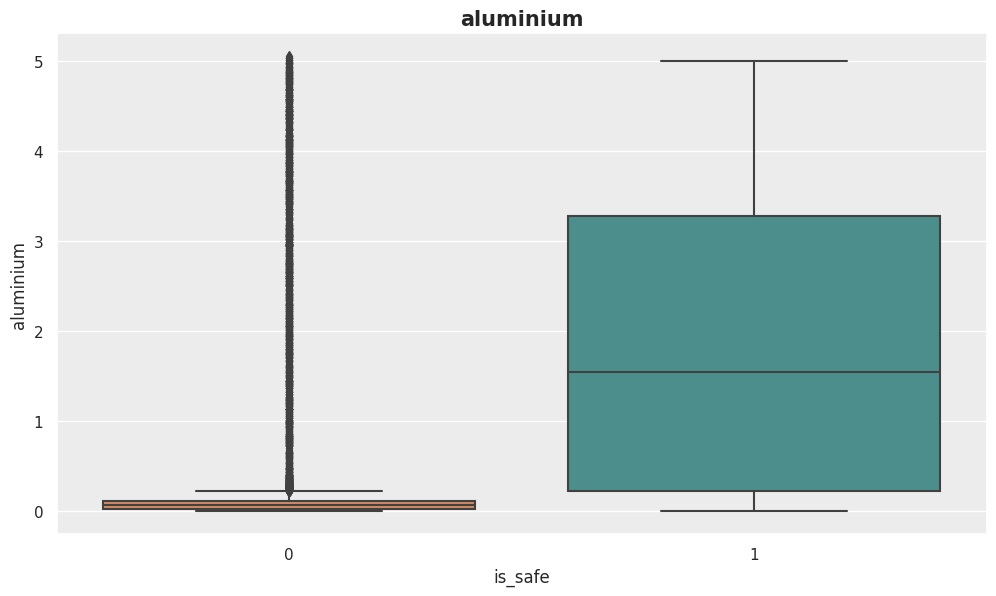

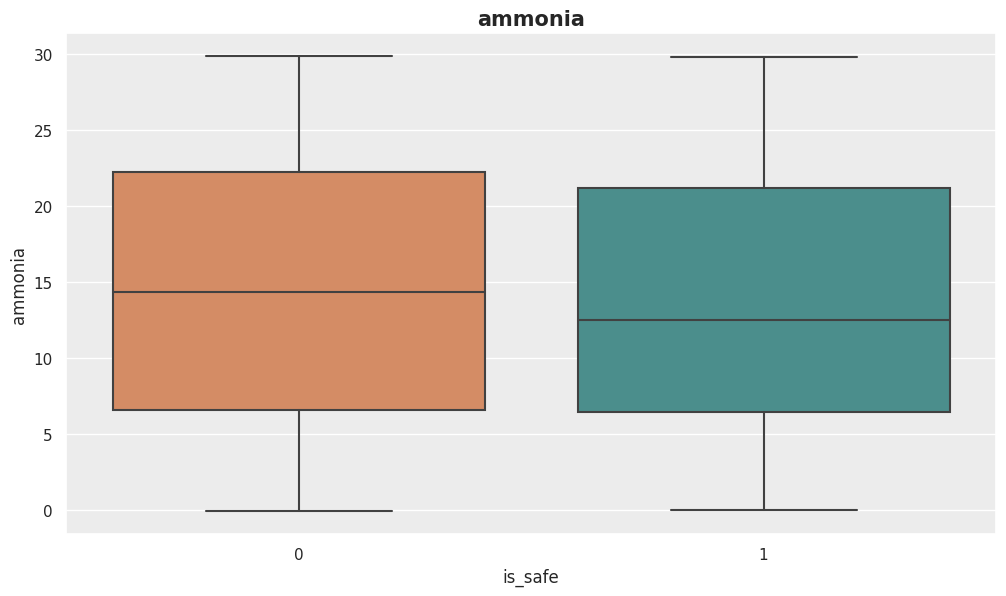

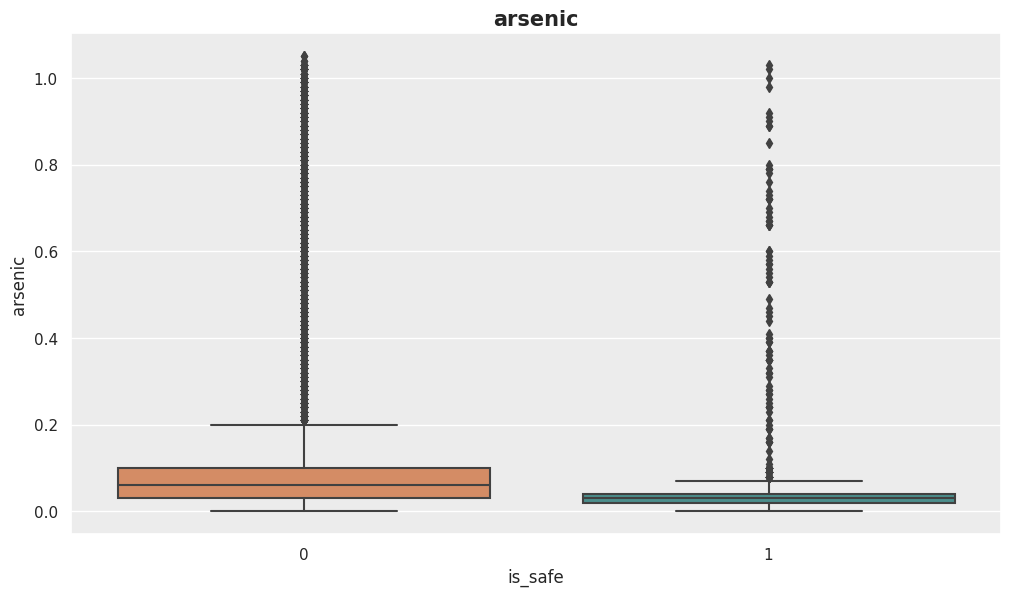

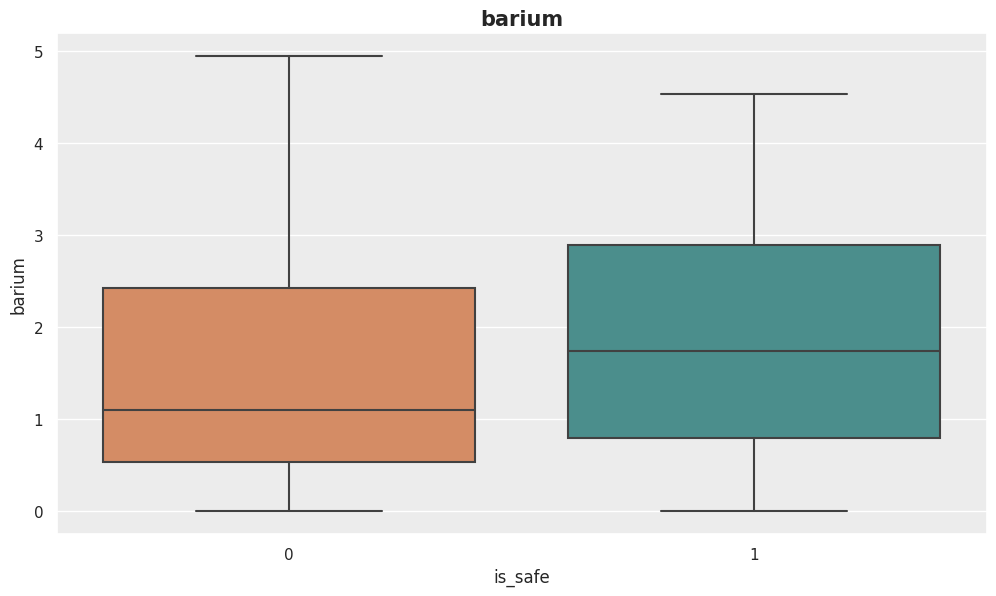

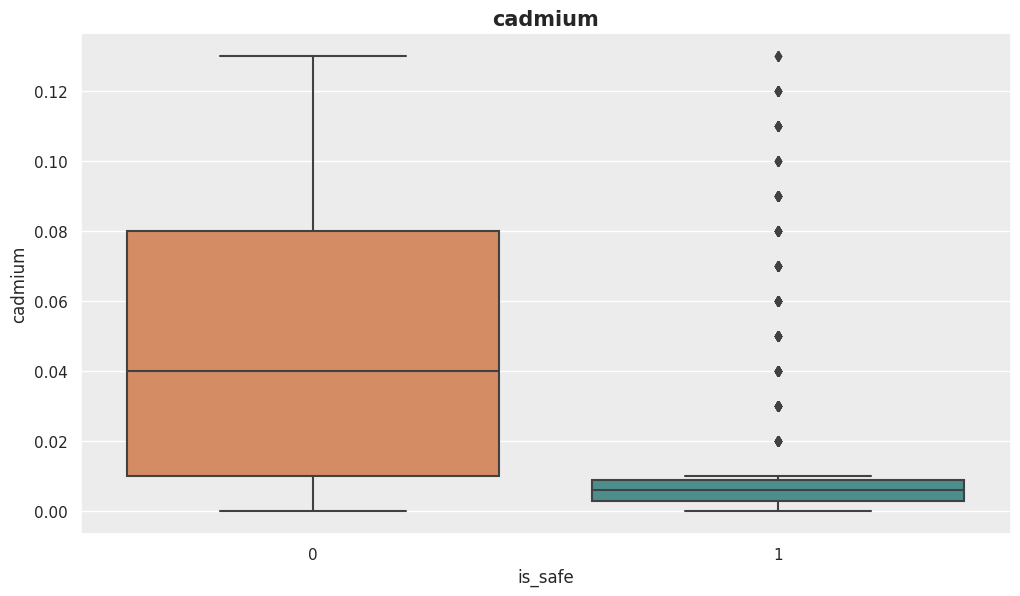

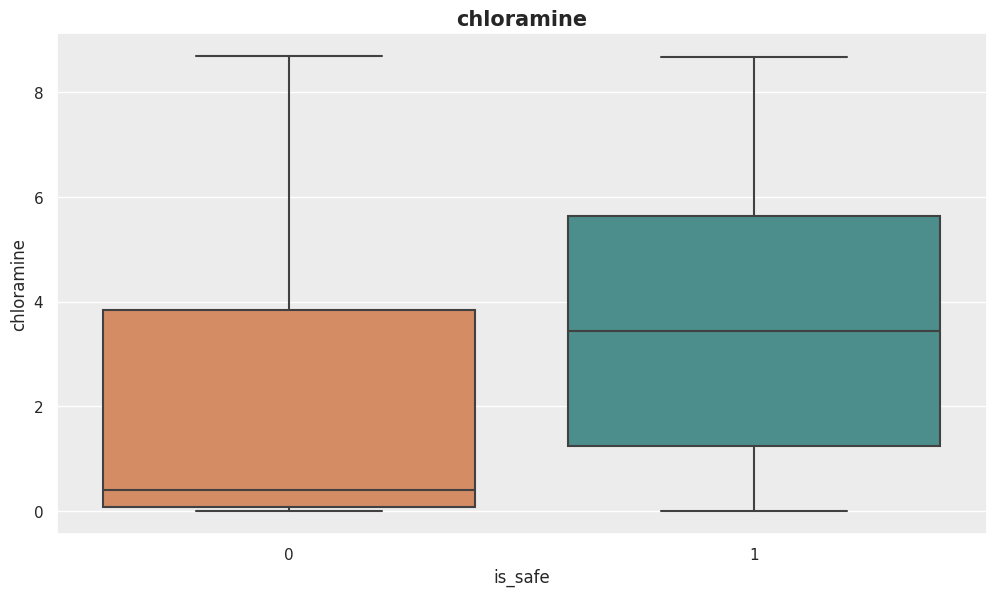

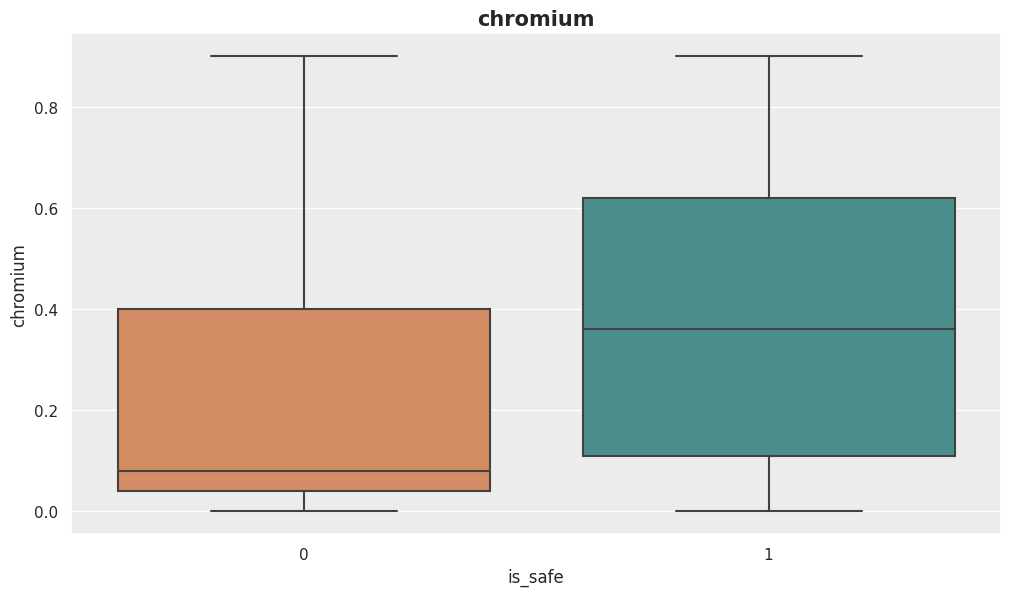

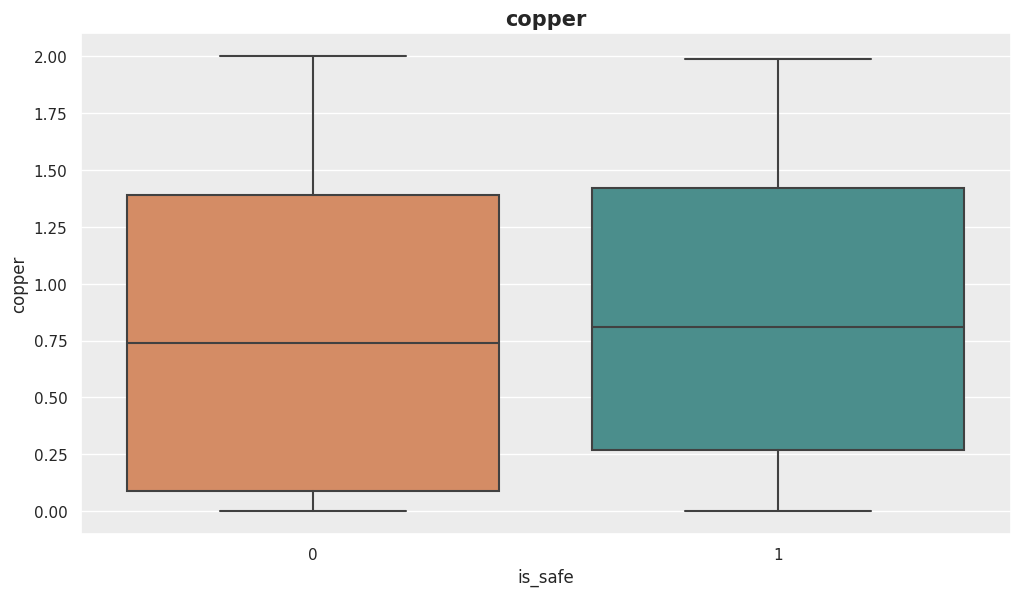

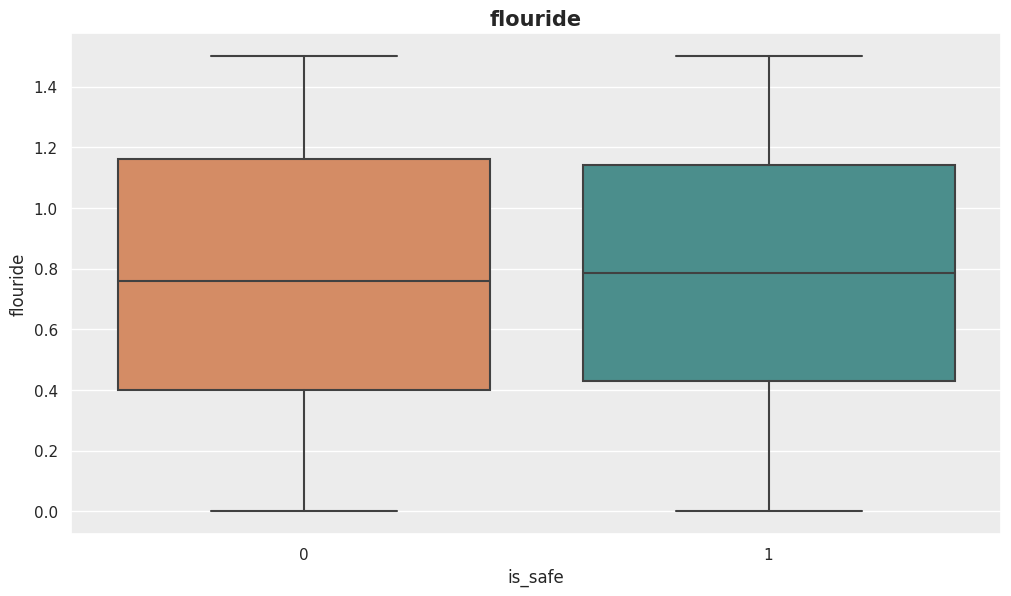

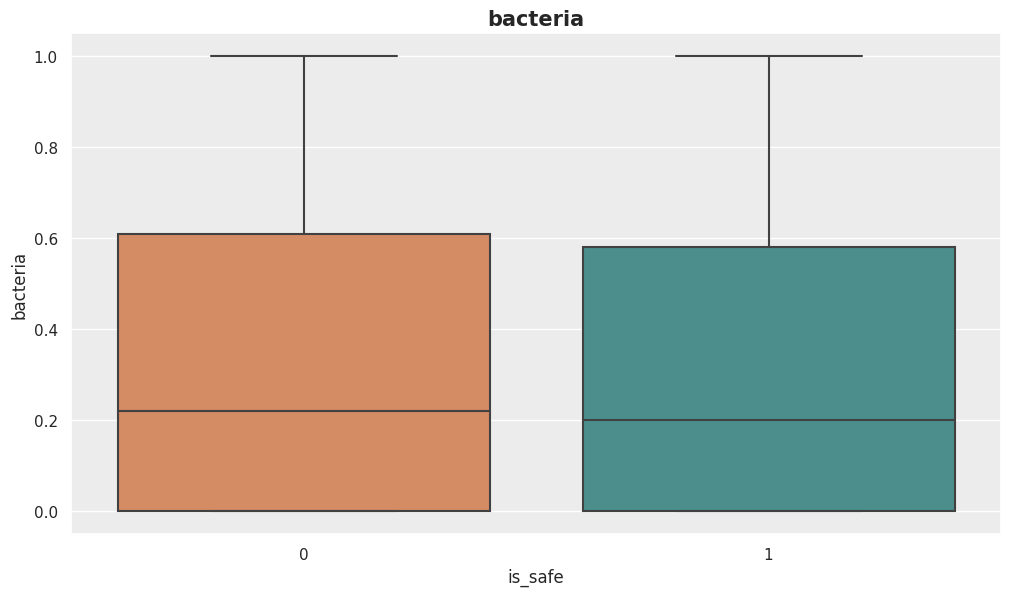

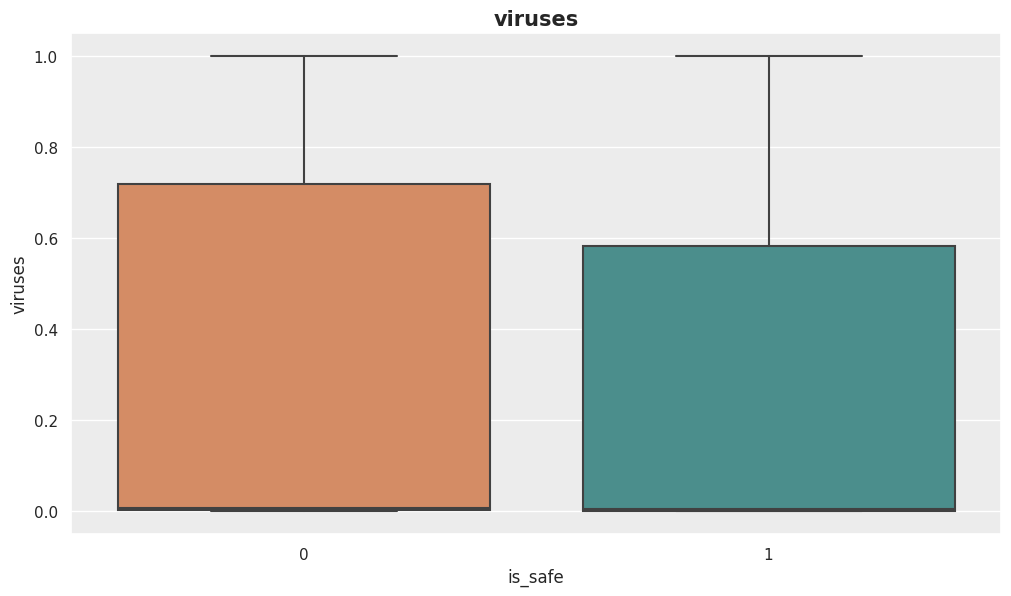

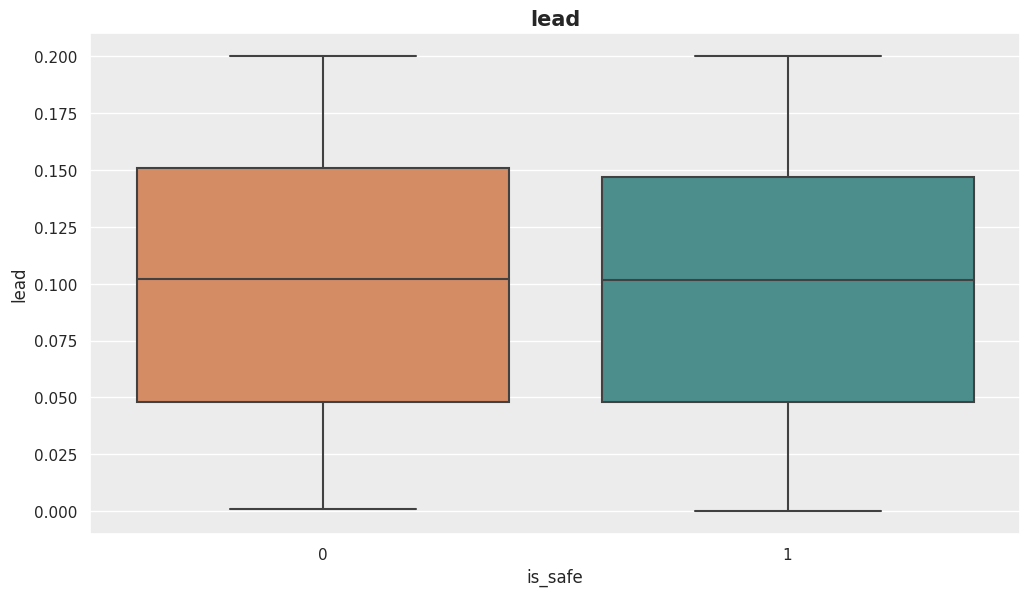

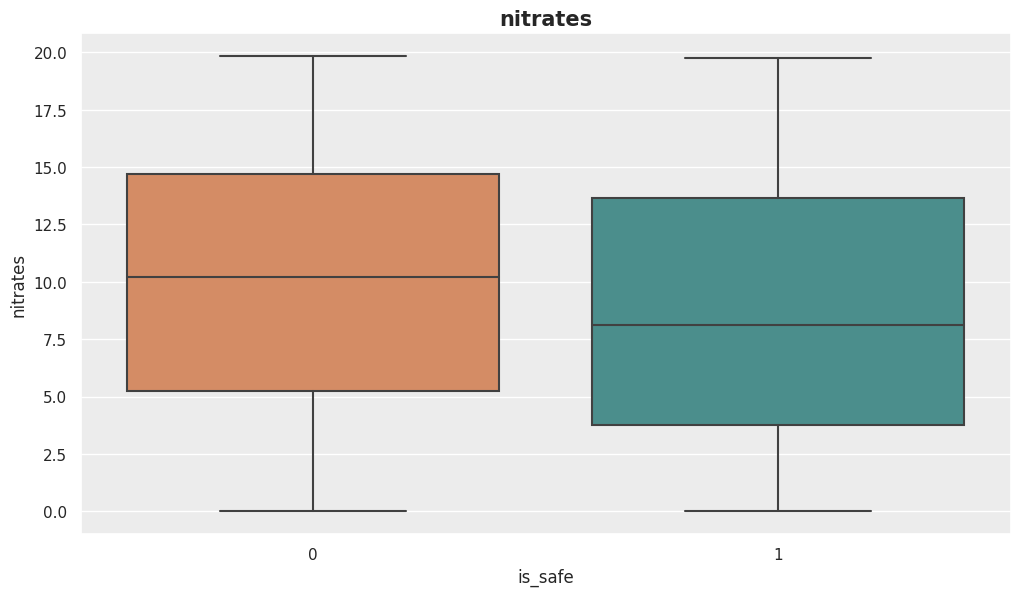

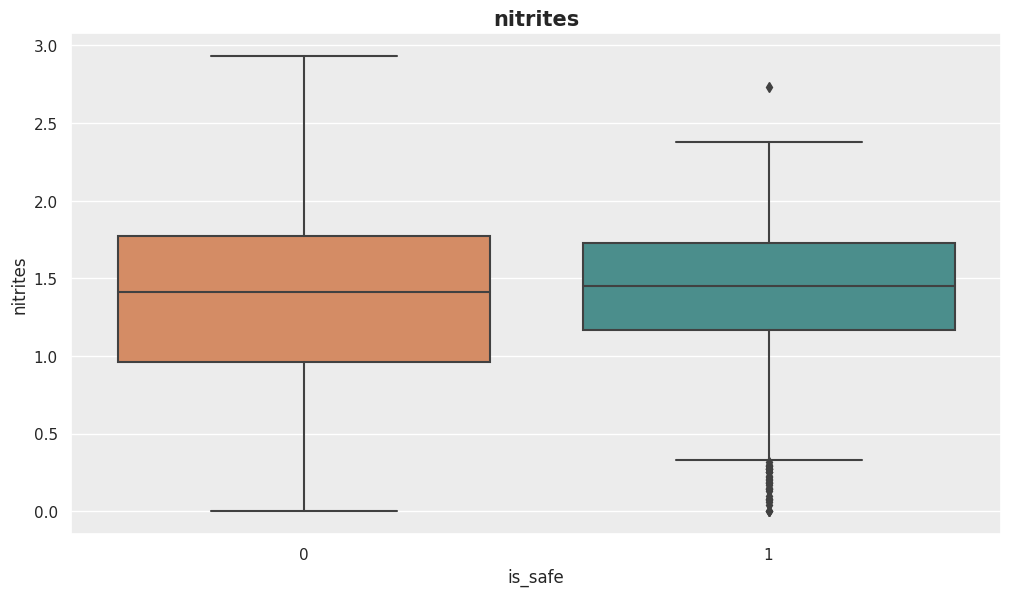

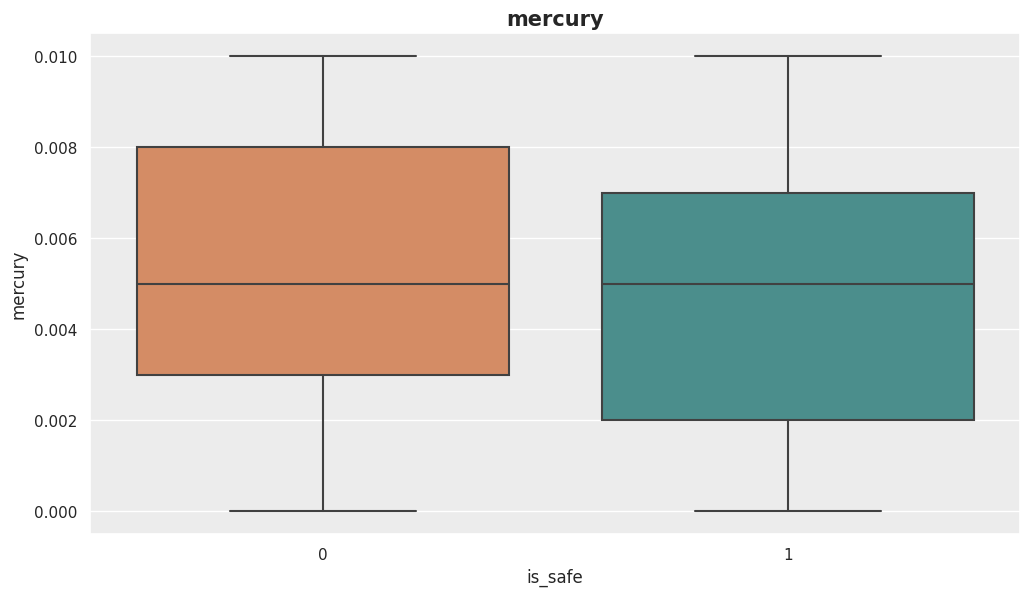

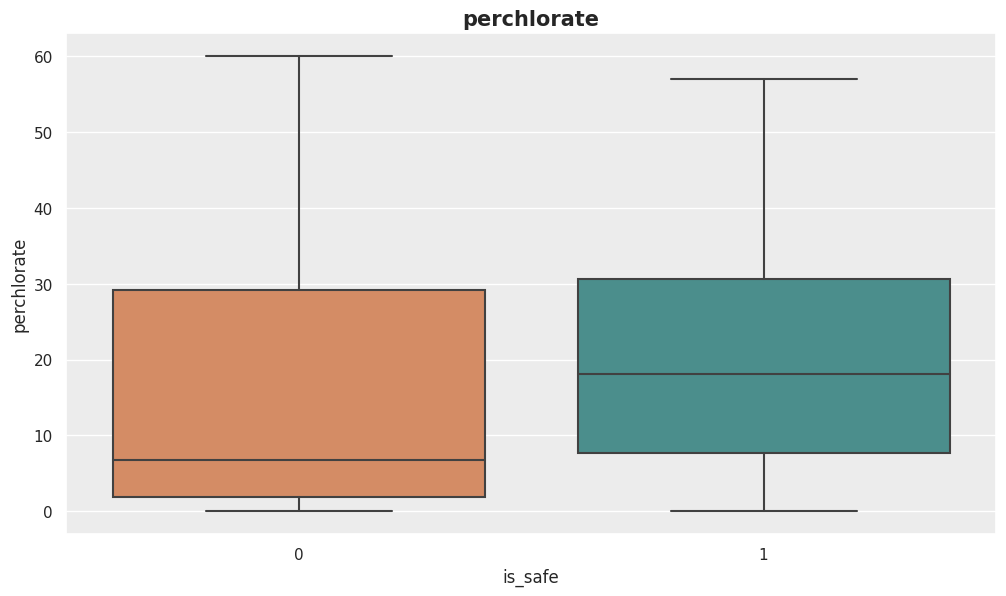

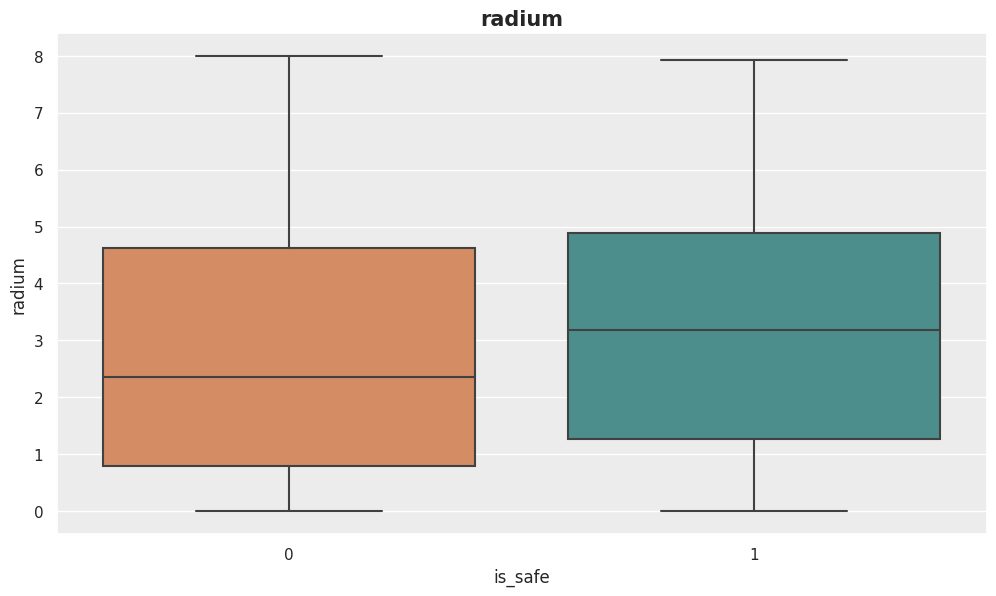

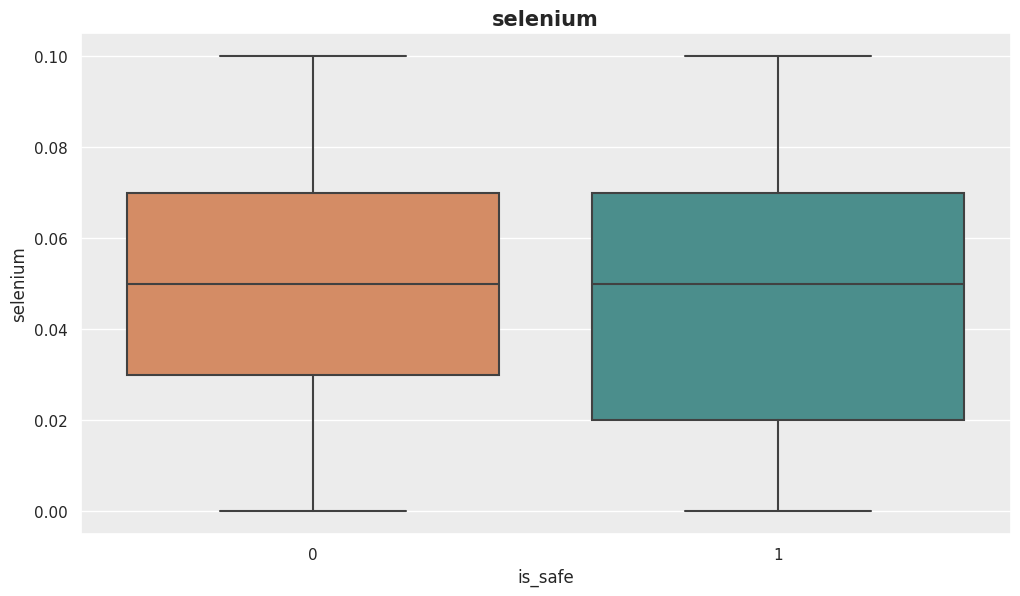

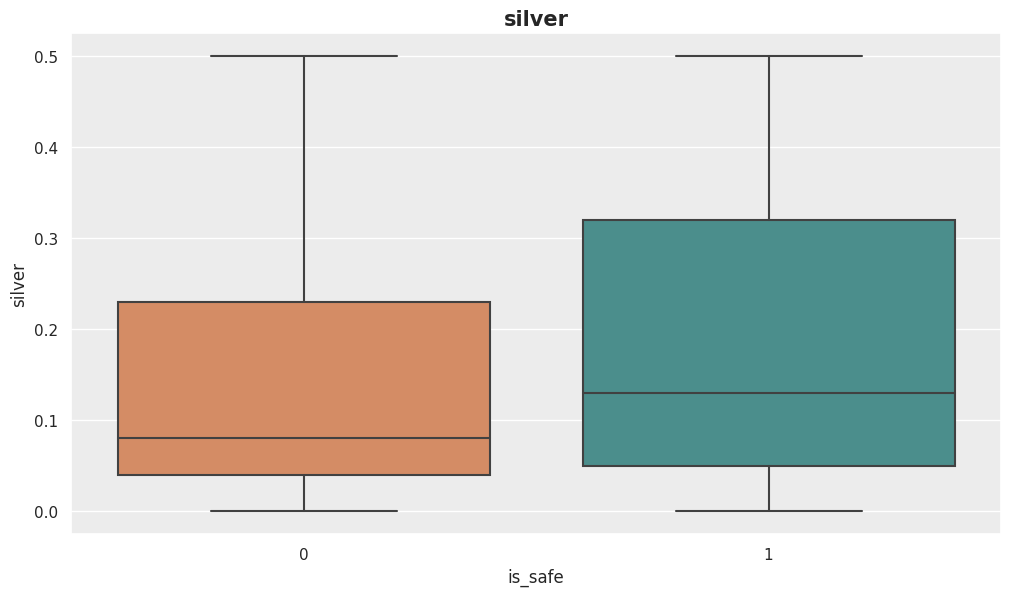

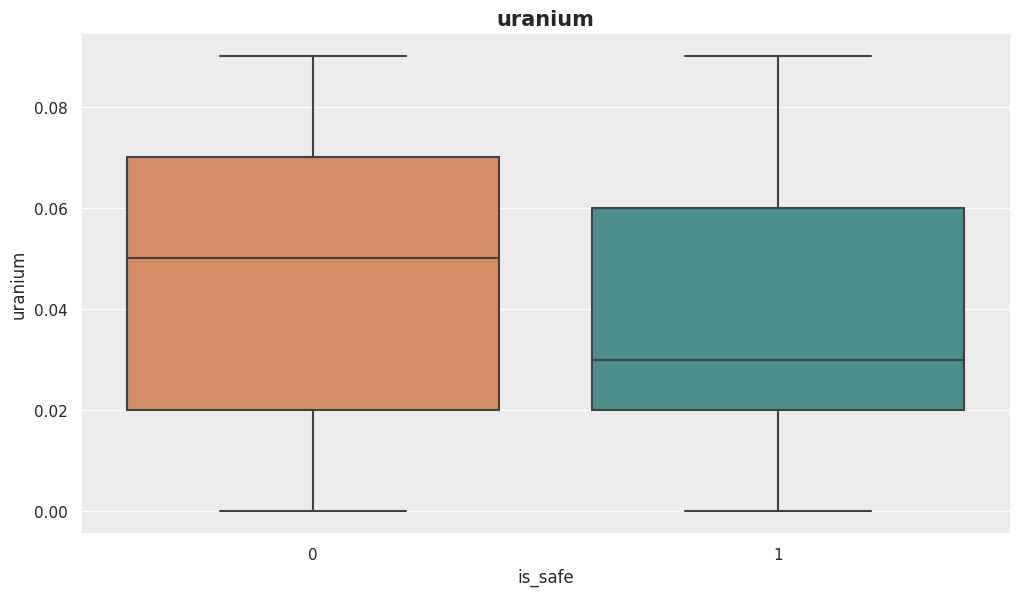

In [7]:
#buat daftar fitur numerik dan plotnya
list_of_num_features = data.loc[:, data.columns != 'is_safe']
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #warna latar belakang semua plot

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5))
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.boxplot(x = data['is_safe'], y = list_of_num_features[feature], data = data, palette=palette_features)
    #tambahkan label ke setiap batang
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

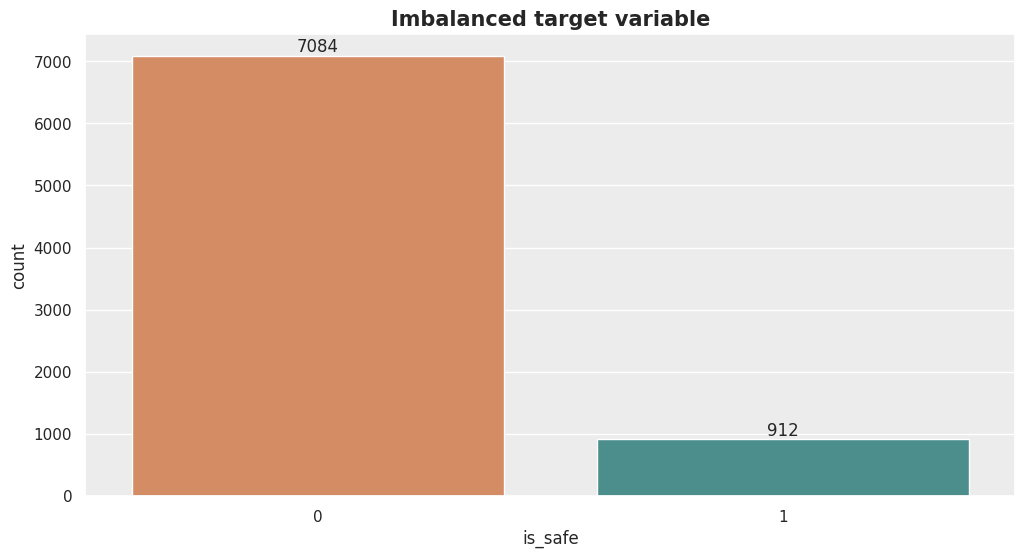

In [8]:
#variabel target plot
sns.set(rc={'axes.facecolor':'#ECECEC'}) #warna latar belakang plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=data['is_safe'], data=data, palette=palette_features)

#tambahkan label ke setiap batang
abs_values = data['is_safe'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#menunjukkan plotnya
plt.show()

In [9]:
#menyeimbangkan variabel target
columns = data.columns
columns = [c for c in columns if c not in ['is_safe']]
y = data['is_safe'] #variabel target sebelumnya
X = data[columns]  #fitur sebelumnya

ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y) #y_train sebagai variabel target seimbang
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y)}\n")
print(X.shape[0] - data.shape[0], 'new random picked points')

Imbalanced target class: 0        1
1        1
2        0
3        1
4        1
        ..
14163    1
14164    1
14165    1
14166    1
14167    1
Name: is_safe, Length: 14168, dtype: int64

Balanced target class: Counter({1: 7084, 0: 7084})

6172 new random picked points


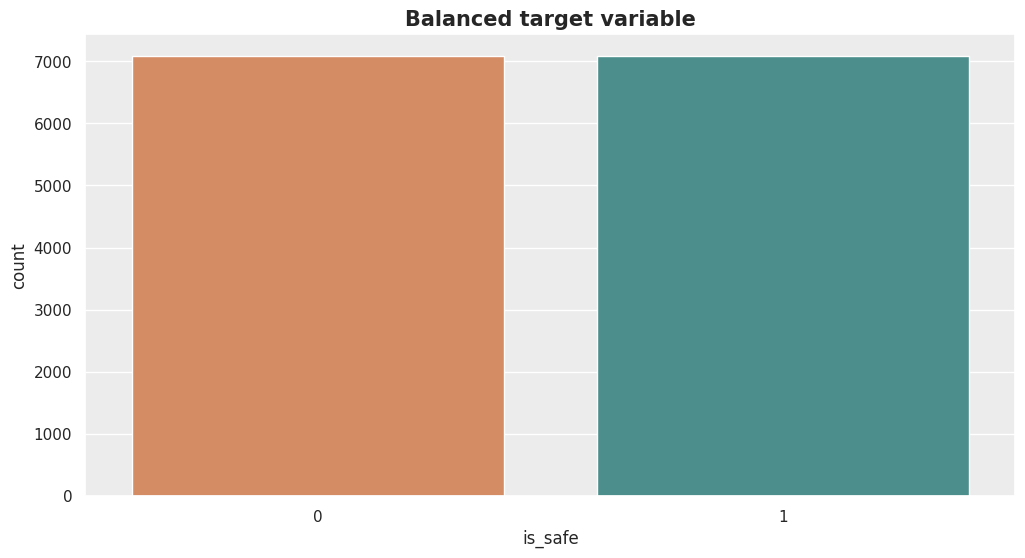

In [10]:
#plot variabel target seimbang
sns.set(rc={'axes.facecolor':'#ECECEC'}) #warna latar belakang plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y, data=data, palette=palette_features)
plt.show()

In [ ]:
X.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


In [ ]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: is_safe, dtype: int64

In [ ]:
X.shape

(14168, 20)

In [ ]:
df = X
df['is_safe'] = y
df


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,3.47,6.99,0.03,1.43,0.007,5.98,0.36,1.95,1.48,0.00,...,0.183,3.84,1.67,0.005,43.75,7.70,0.06,0.44,0.08,1
14164,0.06,2.05,0.05,2.76,0.008,0.83,0.54,0.28,0.93,0.00,...,0.175,17.17,1.58,0.003,46.00,4.85,0.01,0.27,0.02,1
14165,3.73,6.59,0.02,2.24,0.001,7.42,0.23,0.30,1.02,0.00,...,0.032,10.94,1.64,0.004,15.32,1.35,0.07,0.35,0.02,1
14166,1.56,23.09,0.10,4.27,0.120,8.13,0.15,0.96,1.41,0.00,...,0.130,12.32,1.51,0.001,38.76,4.74,0.01,0.03,0.03,1


In [ ]:
#from google.colab import files

#df.to_csv('new file data water quality.csv')
#files.download('new file data water quality.csv')

**2.4 Menganalisis hubungan antar variabel**

Kami juga ingin memeriksa apakah terdapat korelasi yang signifikan secara statistik (<= -0,70, >= 0,70) antara semua fitur. Korelasi tertinggi antara Cadmium dan Is_safe (-0.26) serta antara Virus dan Bateria (0.62).

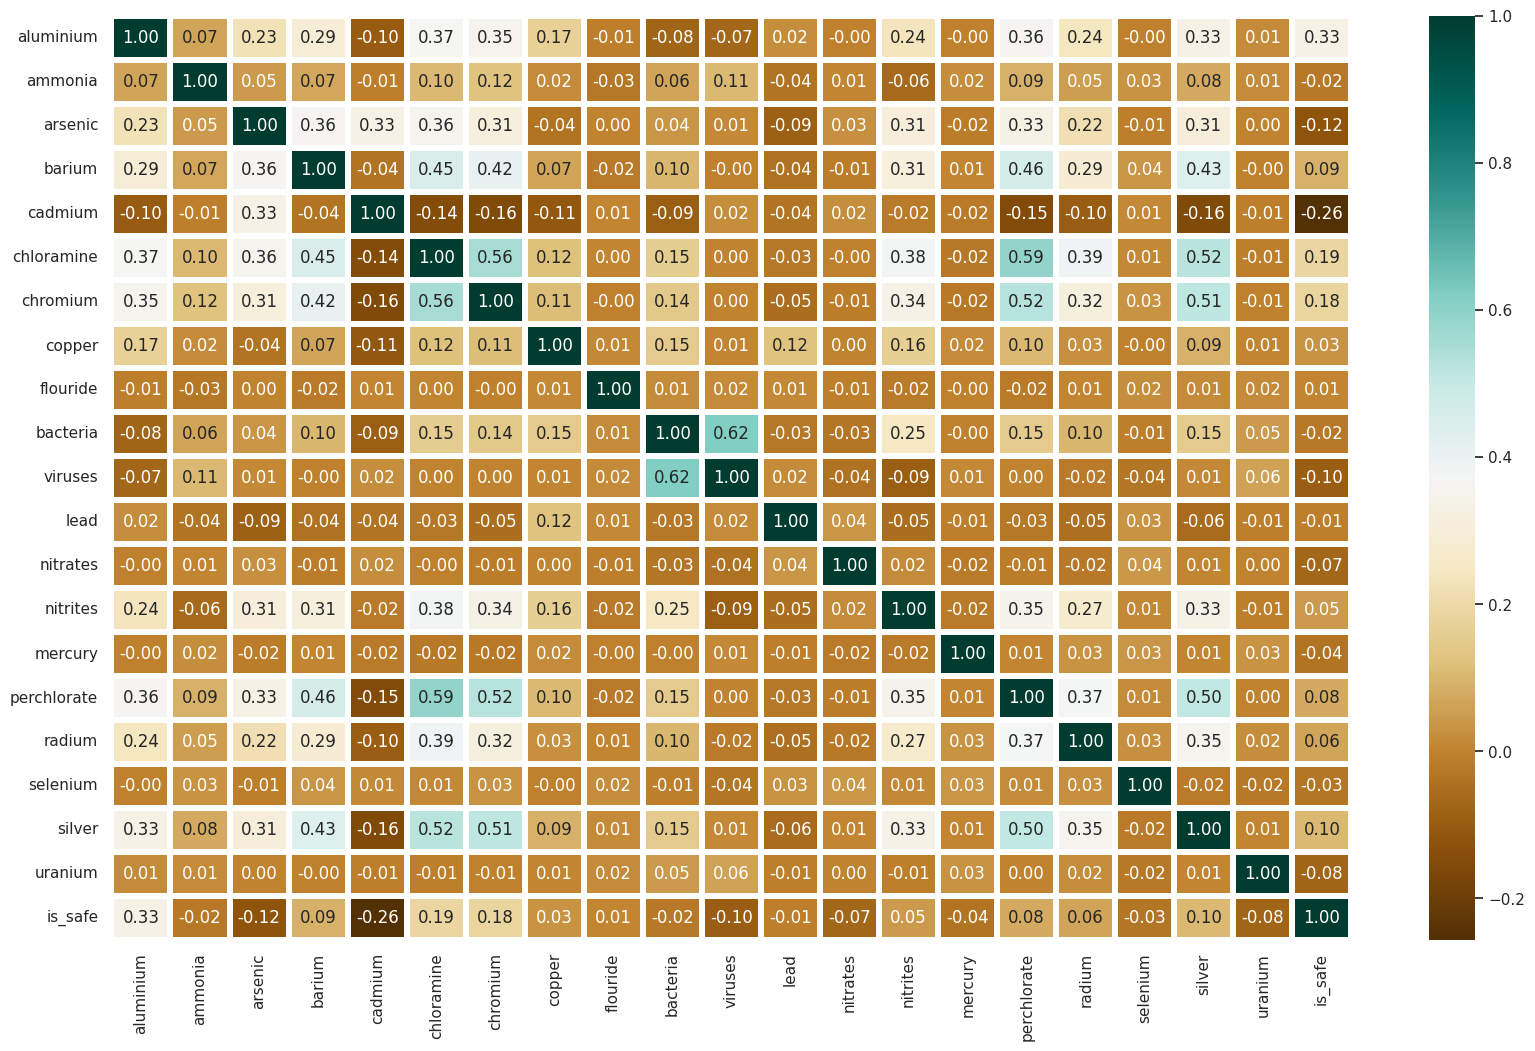

In [ ]:
# merencanakan matriks korelasi untuk melihat hubungan atau kekurangan antar variabel
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

#3. Hasil K-NN tanpa prepared data

Sebelum melanjutkan lebih jauh, kita perlu membagi kumpulan data menjadi bagian pelatihan dan pengujian. Untuk tujuan ini, kita akan menggunakan fungsi *train test split function*.

Kami mengerjakannya langkah demi langkah semua kemungkinan parameter fungsi train_test_split:
* X: fitur
* y: variabel target
* test_size: ukuran data pengujian (biasanya 20% atau 30%), angka antara 0 hingga 1.
* membuat stratifikasi: jika kita tidak menangani variabel target yang tidak seimbang, kita akan menggunakan argumen ini sehingga setiap model ML akan mengambil proporsi data pelatihan dan pengujian yang sama terkait variabel target (misalnya 50% data pelatihan/pengujian mewakili variabel target 1, 50% data latih/uji mewakili variabel target 0).
* random_state: kami ingin model K-NN kami dievaluasi pada subset data pelatihan yang sama. Oleh karena itu kami akan memberikan nilai random_state 1.

In [ ]:
#persiapan dari train dan test data untuk K-NN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #80 % of train data, 20 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11334, 21), (2834, 21), (11334,), (2834,))

[[1072  318]
 [  19 1425]]


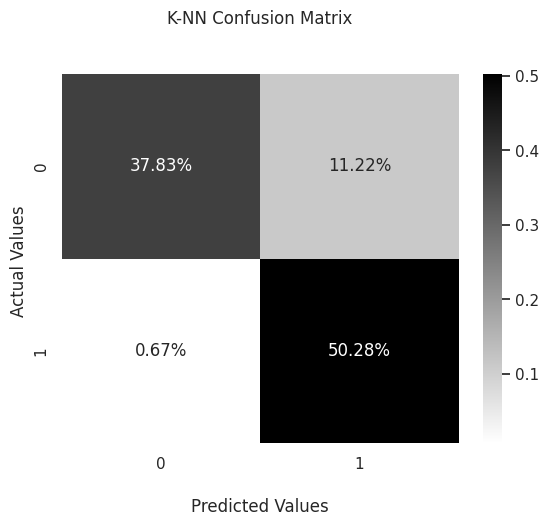

In [ ]:
#implementasi algoritma K-NN
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_test)

#plotting Confusion Matriks
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Label tiket - Daftar harus disusun berdasarkan abjad
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Menampilkan visualisasi Confusion Matrix.
plt.show()

In [ ]:
#evaluasi K-NN: diagram pivot metrik
print(classification_report(y_test, y_pred_knnc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knnc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knnc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knnc),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knnc),3)))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1390
           1       0.82      0.99      0.89      1444

    accuracy                           0.88      2834
   macro avg       0.90      0.88      0.88      2834
weighted avg       0.90      0.88      0.88      2834

Accuracy Score : 0.881
Precision Score : 0.818
Recall Score : 0.987
F-Score : 0.894


#4. Hasil implementasi K-NN setelah preparation data

In [ ]:
#persiapan dari train dan test data untuk ML model
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state = 1) #80 % of train data, 20 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11334, 21), (2834, 21), (11334,), (2834,))

**Skala Ulang Data**

In [ ]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('Setelah menstandardisasi fitur kami, 5 baris pertama data kami sekarang terlihat seperti ini:\n')
print(pd.DataFrame(X_train_std).head())

Setelah menstandardisasi fitur kami, 5 baris pertama data kami sekarang terlihat seperti ini:

         0         1         2         3         4         5         6   \
0 -0.502690 -0.339676  3.790248  0.358292 -0.336960  0.112135  0.087078   
1 -0.619722  0.802696  2.611704 -0.343430  2.213702 -0.243162 -0.197088   
2 -0.762762 -1.581335 -0.153344 -1.151226  0.513261 -1.019406 -0.978547   
3  2.481642  0.623523 -0.334659  0.570440 -0.762071 -1.023268 -0.410213   
4 -0.710748 -0.197022 -0.379987  1.541427 -0.875433  0.324540  0.584370   

         7         8         9   ...        11        12        13        14  \
0 -0.444234 -0.125768 -0.089918  ... -1.226733  1.843097  0.555389  0.318936   
1  0.007929  0.731114  0.095479  ... -0.255491 -0.565250  0.613177 -1.349648   
2  1.348829  1.263771 -0.955104  ... -0.619707  1.478088 -0.908550 -0.682214   
3 -0.724888  1.425884  1.516856  ...  0.299504 -1.114553  0.805800 -1.349648   
4 -1.083501  1.194294  1.578655  ... -0.463615  0.6102

**Reduce Dimensionality**

Untuk tujuan ini kita akan menggunakan salah satu metode Pemilihan Fitur. Pemilihan fitur merupakan konsep penting dalam ML. Ini membantu meningkatkan kekuatan prediksi algoritme dengan memilih fitur paling penting untuk memprediksi variabel target dan menghilangkan fitur yang berlebihan (pengurangan dimensi).

In [ ]:
# temukan 10 fitur dengan skor terbaik
select_feature = SelectKBest(f_classif, k=10).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [2.64713287e+03 2.01202200e+01 5.73440830e+02 2.59361238e+02
 2.36754911e+03 1.05804215e+03 9.06491134e+02 1.05874436e+01
 1.95413027e-01 2.01902966e+01 3.29257639e+02 4.93728751e+00
 1.23076061e+02 7.18957281e+01 3.76201273e+01 2.08183276e+02
 1.41456452e+02 4.65543764e+01 3.20145215e+02 1.36974367e+02
            inf]
Feature list: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[[1287  103]
 [   4 1440]]


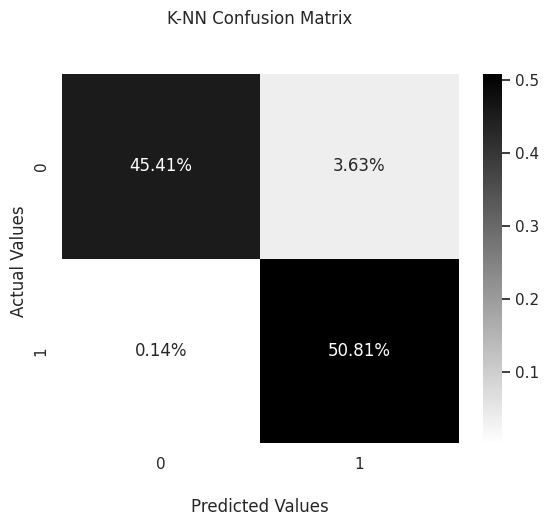

In [ ]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)

knnc = KNeighborsClassifier()
knnc = knnc.fit(X_train_2,y_train)

y_pred_knnc = knnc.predict(X_test_2)

cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Label tiket - Daftar harus disusun berdasarkan abjad
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Menampilkan visualisasi Confusion Matrix.
plt.show()

In [ ]:
#evaluasi K-NN: diagram pivot metrik
print(classification_report(y_test, y_pred_knnc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knnc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knnc,pos_label=0),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knnc,pos_label=0),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knnc,pos_label=0),3)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1390
           1       0.93      1.00      0.96      1444

    accuracy                           0.96      2834
   macro avg       0.97      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834

Accuracy Score : 0.962
Precision Score : 0.997
Recall Score : 0.926
F-Score : 0.96
